In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics 
from sklearn.metrics import mean_squared_error

In [89]:
laptop_prices_dataset = pd.read_csv("Laptop_price.csv")
laptop_prices_dataset.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [90]:
laptop_prices_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [91]:
print(laptop_prices_dataset['Brand'].value_counts())

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64


In [92]:
laptop_prices_dataset.replace({'Brand':{'Dell':0,'Asus':1,'Acer':2,'Lenovo':3,'HP':4}},inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_24612\1615213769.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  laptop_prices_dataset.replace({'Brand':{'Dell':0,'Asus':1,'Acer':2,'Lenovo':3,'HP':4}},inplace = True)


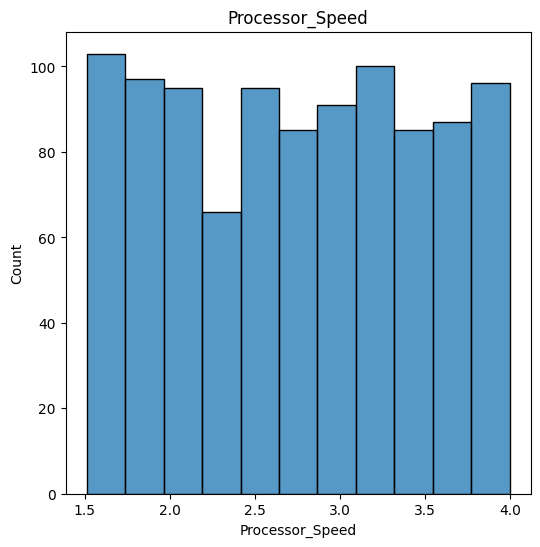

In [93]:
plt.figure(figsize =(6,6))
sns.histplot(laptop_prices_dataset['Processor_Speed'])
plt.title("Processor_Speed")
plt.show()


<Figure size 600x600 with 0 Axes>

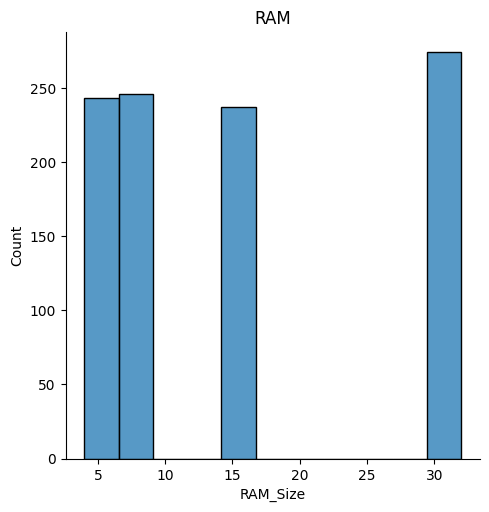

In [94]:
plt.figure(figsize = (6,6))
sns.displot(laptop_prices_dataset['RAM_Size'])
plt.title("RAM")
plt.show()

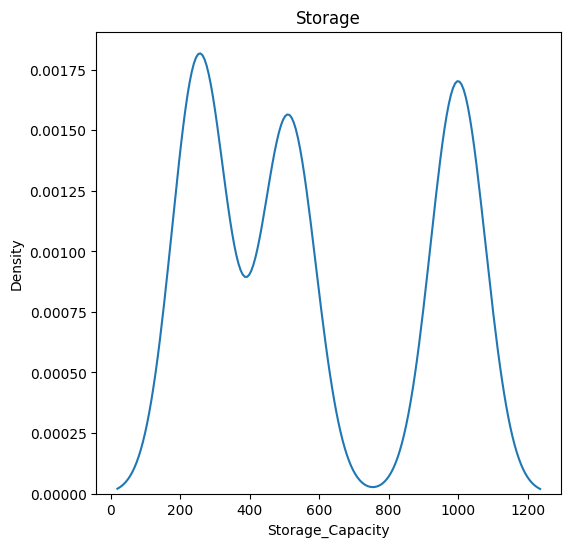

In [95]:
plt.figure(figsize =(6,6))
sns.kdeplot(laptop_prices_dataset['Storage_Capacity'])
plt.title("Storage")
plt.show()

In [96]:
X = laptop_prices_dataset.drop(['Brand','Price'], axis =1)
Y = laptop_prices_dataset['Price']

In [97]:
print(X,Y)

     Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight
0           3.830296        16               512    11.185147  2.641094
1           2.912833         4              1000    11.311372  3.260012
2           3.241627         4               256    11.853023  2.029061
3           3.806248        16               512    12.280360  4.573865
4           3.268097        32              1000    14.990877  4.193472
..               ...       ...               ...          ...       ...
995         3.343584         4              1000    12.587095  3.162399
996         2.780555         8               256    12.679356  3.750265
997         3.200569         4               512    12.666315  3.392612
998         1.604182         8               256    11.215581  3.857613
999         1.711980         4               256    16.561498  3.440883

[1000 rows x 5 columns] 0      17395.093065
1      31607.605919
2       9291.023542
3      17436.728334
4      32917.990718
           

In [98]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [99]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    
    train_error = metrics.r2_score(Y_train,ytrain_predict)
    test_error  = metrics.r2_score(Y_test,ytest_predict)
    
    
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)

    plt.scatter(Y_train, ytrain_predict, marker='o', label = 'Train Predictions')
    plt.scatter(Y_test, ytest_predict, marker='^', label = 'Test Prediction')

    plt.plot([min(Y_train),max(Y_train)],[min(Y_train),max(Y_train)],color = 'black',linewidth = 2, label = 'Ideal ')
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("True vs Predicted Values")
    plt.legend()
    plt.show()
    print('coefficients: ')
    print(coefs)

In [100]:
lin_reg_model = LinearRegression()

In [101]:
lin_reg_model.fit(X_train,Y_train)


LinearRegression()

Training error (rmse): 0.999544189389419
Testing error (rmse): 0.9996472163447738


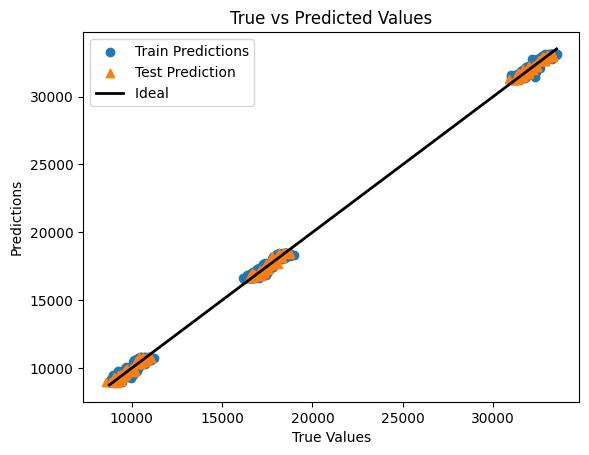

coefficients: 
[493.45511181699476, 199.62330950453727, 50.496418538902695, 29.98153594784683, 19.677586550487778, -7.343678274155585]


In [102]:
display_results(lin_reg_model)

In [103]:
Lasso_model = Lasso()

In [104]:
Lasso_model.fit(X_train,Y_train)


Lasso()

Training error (rmse): 0.9995441487204381
Testing error (rmse): 0.9996475654456467


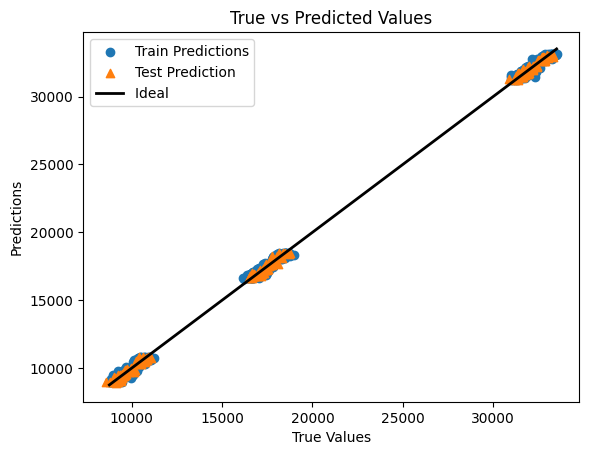

coefficients: 
[499.919541821404, 197.7491689038692, 50.4926037106607, 29.981042399236536, 19.286998216136233, -6.043099697546452]


In [105]:
display_results(Lasso_model)